<a href="https://colab.research.google.com/github/VasudevKrishna1990/GenAI/blob/main/Class_3_edgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

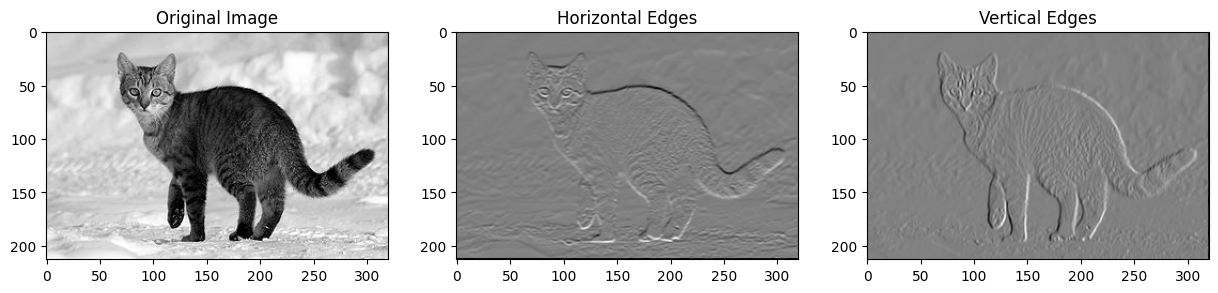

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = tf.keras.utils.get_file('cat.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
img = image.load_img(img_path, color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Define Sobel filters for horizontal and vertical edge detection
sobel_horizontal = tf.constant([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]], dtype=tf.float32)
sobel_vertical = tf.constant([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]], dtype=tf.float32)

# Reshape the filters to match the convolution operation requirements
sobel_horizontal = tf.reshape(sobel_horizontal, [3, 3, 1, 1])
sobel_vertical = tf.reshape(sobel_vertical, [3, 3, 1, 1])

# Apply convolution to detect edges
horizontal_edges = tf.nn.conv2d(img_array, sobel_horizontal, strides=[1, 1, 1, 1], padding='SAME')
vertical_edges = tf.nn.conv2d(img_array, sobel_vertical, strides=[1, 1, 1, 1], padding='SAME')

# Remove the batch dimension
horizontal_edges = tf.squeeze(horizontal_edges, axis=0)
vertical_edges = tf.squeeze(vertical_edges, axis=0)

# Combine the edges
edges = tf.sqrt(tf.square(horizontal_edges) + tf.square(vertical_edges))
edges = tf.clip_by_value(edges, 0, 255)
edges = tf.cast(edges, tf.uint8)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_array[0, :, :, 0], cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(horizontal_edges, cmap='gray')
axes[1].set_title('Horizontal Edges')
axes[2].imshow(vertical_edges, cmap='gray')
axes[2].set_title('Vertical Edges')
plt.show()
